In [ ]:
#Group 3
#Ali, Qasim
#Hidalgo Trujillo, Roberto
#Khayrullina, Tatiana
#Lee, Jeongseon
#Rozko Iwona


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = 'stanlee.json'
# tweets_data_path = 'stanlee.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
tweets= pd.DataFrame()
#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))


In [11]:
print (len(tweets_data))

13028


In [7]:
import re
def word_in_text(word,tweet):
    count=0
    for tweet in tweets_data:
        #tweet['text'].lower()
        match = re.search(word, tweet['text'])
        if match:
            count = count+1   
            #print(tweet['text'])
    return count

In [9]:
stanlee = word_in_text('stanlee', tweet)
hashtagstanlee = word_in_text('#StanLee', tweet)
Stan_Lee = word_in_text('Stan Lee', tweet)
STANLEE = word_in_text('STANLEE', tweet)
STAN_LEE = word_in_text('STAN LEE', tweet)
hashtagSTANLEE = word_in_text('#STANLEE', tweet)


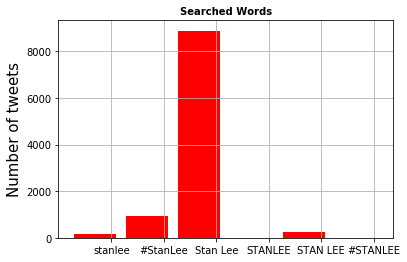

In [10]:
prg_langs = ['stanlee', '#StanLee', 'Stan Lee', 'STANLEE', 'STAN LEE', '#STANLEE']
tweets_by_prg_lang = [stanlee, hashtagstanlee, Stan_Lee, STANLEE, STAN_LEE, hashtagSTANLEE]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='r')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Searched Words', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

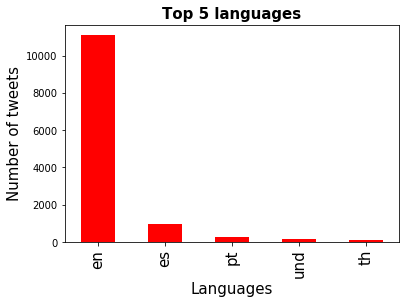

In [23]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='blue')

In [26]:
# get only english tweet for bag of word
df_text_lang = pd.DataFrame({'text': tweets['text'], 'lang': tweets['lang']  })
only_en_tweet = df_text_lang[df_text_lang['lang'].str.contains("en")]

In [29]:
#create bag of word
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer(stop_words='english').fit(only_en_tweet['text'])  # exclude common words
bag_of_words = vec.transform(only_en_tweet['text'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True) # sorted by the words_freq
# https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

[('rt', 9707),
 ('stan', 9339),
 ('lee', 8879),
 ('creator', 7725),
 ('dies', 7530),
 ('https', 6355),
 ('marvel', 4575),
 ('spongebob', 3910),
 ('weeks', 3727),
 ('later', 3724),
 ('e6entric', 3706),
 ('p2ex89l58g', 3706),
 ('stephen', 1296),
 ('new', 1153),
 ('super', 1098),
 ('kid', 1026),
 ('comic', 996),
 ('book', 971),
 ('create', 890),
 ('genius', 886),
 ('wanted', 885),
 ('jewish', 874),
 ('recently', 866),
 ('jewishvoice', 865),
 ('york', 864),
 ('deceased', 863),
 ('heroine', 862),
 ('stanlee', 778),
 ('hillenburg', 725),
 ('really', 703),
 ('mural', 659),
 ('south', 656),
 ('just', 642),
 ('popped', 635),
 ('49th', 635),
 ('andrews', 635),
 ('year', 512),
 ('st', 470),
 ('therealstanlee', 453),
 ('comics', 451),
 ('karl', 444),
 ('stefan', 437),
 ('hawking', 428),
 ('rest', 384),
 ('memorial', 382),
 ('beloved', 377),
 ('work', 376),
 ('peace', 373),
 ('lost', 370),
 ('excelsior', 368),
 ('shawnwarner629', 364),
 ('awesome', 363),
 ('los', 352),
 ('respect', 349),
 ('angeles

# Character analysis 

In [4]:
# this is the same with above
import json
import matplotlib.pyplot as plt
import re
import pandas as pd 
import numpy as np 
import seaborn as sns
import string
import nltk
import warnings 
%matplotlib inline

tweets_data_path = 'stanlee.json'
# tweets_data_path = 'stanlee.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
tweets= pd.DataFrame()

#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

# if it has list, it display the value as it is. If not, it has object. 
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['country_code'] = list(map(lambda tweet: tweet['place']['country_code'] if tweet['place'] != None else None, tweets_data))


13028


In [5]:
# get only english tweet for bag of word
df_text_lang = pd.DataFrame({'text': tweets['text'], 'lang': tweets['lang']  })
only_en_tweet = df_text_lang[df_text_lang['text'].str.contains("en")]

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [8]:
tweets['fantastic four'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet))
tweets['daredevil'] = tweets['text'].apply(lambda tweet: word_in_text('daredevil', tweet))
tweets['scarlet witch'] = tweets['text'].apply(lambda tweet: word_in_text('scarlet witch', tweet))
tweets['inhumans'] = tweets['text'].apply(lambda tweet: word_in_text('inhumans', tweet))
tweets['nick fury'] = tweets['text'].apply(lambda tweet: word_in_text('nick fury', tweet))
tweets['black panther'] = tweets['text'].apply(lambda tweet: word_in_text('lack panther', tweet))
tweets['hawkeye'] = tweets['text'].apply(lambda tweet: word_in_text('hawkeye', tweet))
tweets['doctor strange'] = tweets['text'].apply(lambda tweet: word_in_text('doctor strange', tweet))
tweets['ant-man'] = tweets['text'].apply(lambda tweet: word_in_text('ant-man', tweet))
tweets['black widow'] = tweets['text'].apply(lambda tweet: word_in_text('black widow', tweet))
tweets['hulk'] = tweets['text'].apply(lambda tweet: word_in_text('hulk', tweet))
tweets['thor'] = tweets['text'].apply(lambda tweet: word_in_text('thor', tweet))
tweets['iron man'] = tweets['text'].apply(lambda tweet: word_in_text('iron man', tweet))
tweets['x-men'] = tweets['text'].apply(lambda tweet: word_in_text('x-men', tweet))
tweets['spider-man'] = tweets['text'].apply(lambda tweet: word_in_text('spider-man', tweet))

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet) or word_in_text('daredevil', tweet) 
                                          or word_in_text('scarlet witch', tweet) or word_in_text('inhumans', tweet)  or word_in_text('nick fury', tweet) 
                                          or word_in_text('black panther', tweet)  or word_in_text('hawkeye', tweet)  or word_in_text('doctor strange', tweet) 
                                          or word_in_text('ant-man', tweet)  or word_in_text('black widow', tweet) 
                                          or word_in_text('hulk', tweet)  or word_in_text('thor', tweet)  or word_in_text('iron man', tweet) 
                                          or word_in_text('x-men', tweet)  or word_in_text('spider-man', tweet) )


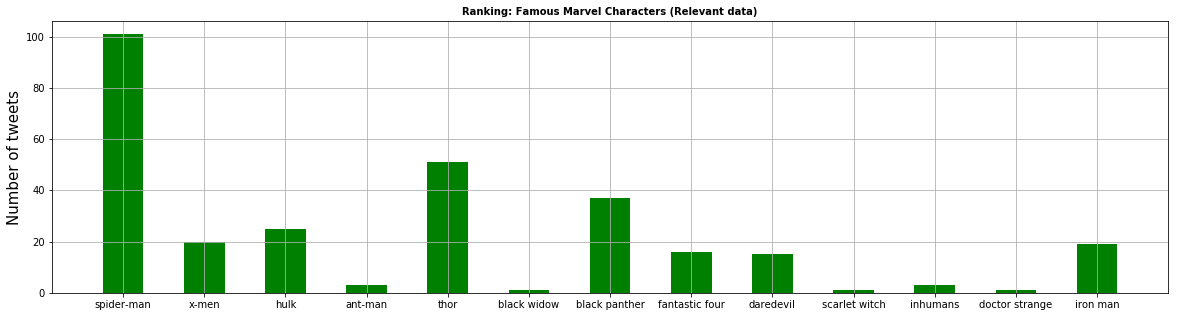

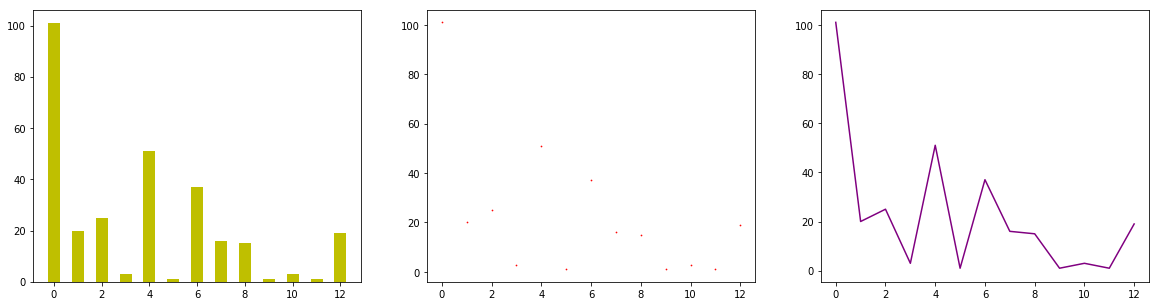

In [12]:
prg_langs = ['spider-man', 'x-men', 'hulk', 'ant-man','thor' ,'black widow','black panther','fantastic four', 
             'daredevil', 'scarlet witch','inhumans','doctor strange','iron man']

tweets_by_prg_heros = [tweets[tweets['relevant'] == True]['spider-man'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['x-men'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['hulk'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['ant-man'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['thor'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['black widow'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['black panther'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['fantastic four'].value_counts()[True]  ,
                      tweets[tweets['relevant'] == True]['daredevil'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['scarlet witch'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['inhumans'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['doctor strange'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['iron man'].value_counts()[True]
                      ]
x_pos = list(range(len(prg_langs)))
width = 0.5 # this is bar width
#figsize=(10, 5) set the width the each column
fig, ax = plt.subplots( figsize=(20, 5))
plt.bar(x_pos, tweets_by_prg_heros, width ,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Famous Marvel Characters (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p - 0.3 + 0.6 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.wspace = 100
# plt.figure(2, dpi=500, figsize=(50,50))
plt.grid()


fig, ax1 = plt.subplots(1, 3, figsize=(20, 5))
ax1[0].bar(x_pos, tweets_by_prg_heros, width ,alpha=1,color='y')
ax1[1].scatter(x_pos, tweets_by_prg_heros, width ,alpha=1,color='r')
ax1[2].plot(x_pos, tweets_by_prg_heros, width ,alpha=1,color='purple')


In [17]:
# get the only relevant data from the tweets
df_tweet_characters_only = tweets.loc[tweets['relevant'] == True].copy()

# removed not required columns
df_tweet_characters_only = df_tweet_characters_only.drop(['text', 'relevant',  'ant-man','black widow','fantastic four', 'daredevil','scarlet witch','inhumans','nick fury','hawkeye','doctor strange','iron man'], axis=1)

# # Fill all none value with the most value 
df_tweet_characters_only['lang'] = df_tweet_characters_only['lang'].fillna(df_tweet_characters_only['lang'].mode()[0]) #with mean value
df_tweet_characters_only.country = df_tweet_characters_only.country.fillna(df_tweet_characters_only['country'].mode()[0]) #with mean value
df_tweet_characters_only.country_code = df_tweet_characters_only.country_code.fillna(df_tweet_characters_only.country_code.mode()[0]) #with mean value
# df_tweet_characters_only.head()
df_characters_by_language = pd.DataFrame(df_tweet_characters_only.groupby(['lang']).sum())

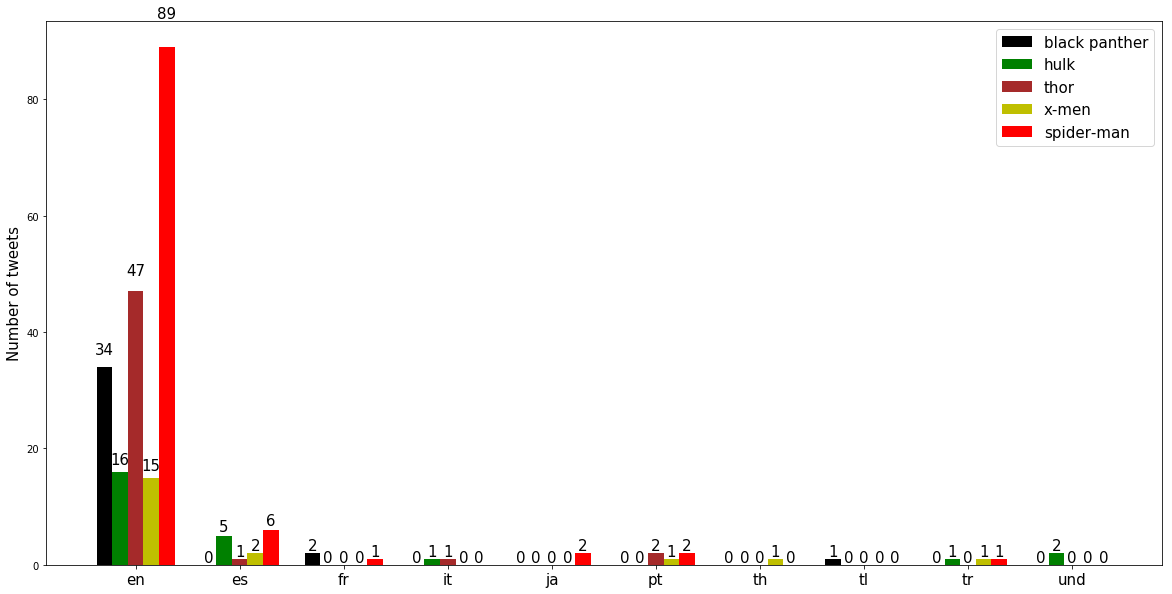

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N = 10 # this is number of value for each column
ind = np.arange(0, N * 2, 2) # increase the space between the bars
width = 0.3     # the width of the bars

fig, ax = plt.subplots( figsize=(20, 10))

kvals = list(df_characters_by_language['black panther'])
rects1 = ax.bar(ind, kvals, width, color='black')
yvals = list(df_characters_by_language['hulk'])
rects2 = ax.bar(ind+width, yvals, width, color='green')
zvals = list(df_characters_by_language['thor'])
rects3 = ax.bar(ind+width*2, zvals, width, color='brown')
Lvals = list(df_characters_by_language['x-men'])
rects4 = ax.bar(ind+width*3, Lvals, width, color='y')
mvals = list(df_characters_by_language['spider-man'])
rects5 = ax.bar(ind+width*4, mvals, width, color='red')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_xticks(ind+width*2) # this is x label location
ax.set_xticklabels( ('en', 'es', 'fr', 'it', 'ja', 'pt', 'th','tl', 'tr', 'und') , fontsize=15, ha='center')
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0], rects5[0]), ('black panther', 'hulk', 'thor', 'x-men', 'spider-man' ) 
         ,fontsize = '15',loc=1)  # loc =1,2,3,4 - each corner

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize = '15')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

# Compare the characters from comic / marvel characters

In [20]:
data = {'text': [] }

tweets_data_path = 'comic_characters.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")

#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        data['text'].append(tweet['text'])
        tweets_data.append(tweet)
    except:
        continue

# tweets = pd.DataFrame()
# this add the data dictionary to dataFrame. Can't use df = pd.DataFrame(data) becuase arrays must all be same length error 
tweets= pd.DataFrame({ key:pd.Series(value) for key, value in data.items() }) #add the data to panda frame


In [21]:
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['fantastic four'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet))
tweets['daredevil'] = tweets['text'].apply(lambda tweet: word_in_text('daredevil', tweet))
tweets['scarlet witch'] = tweets['text'].apply(lambda tweet: word_in_text('scarlet witch', tweet))
tweets['inhumans'] = tweets['text'].apply(lambda tweet: word_in_text('inhumans', tweet))
tweets['nick fury'] = tweets['text'].apply(lambda tweet: word_in_text('nick fury', tweet))
tweets['black panther'] = tweets['text'].apply(lambda tweet: word_in_text('lack panther', tweet))
tweets['hawkeye'] = tweets['text'].apply(lambda tweet: word_in_text('hawkeye', tweet))
tweets['doctor strange'] = tweets['text'].apply(lambda tweet: word_in_text('doctor strange', tweet))
tweets['ant-man'] = tweets['text'].apply(lambda tweet: word_in_text('ant-man', tweet))
tweets['black widow'] = tweets['text'].apply(lambda tweet: word_in_text('black widow', tweet))
tweets['hulk'] = tweets['text'].apply(lambda tweet: word_in_text('hulk', tweet))
tweets['thor'] = tweets['text'].apply(lambda tweet: word_in_text('thor', tweet))
tweets['iron man'] = tweets['text'].apply(lambda tweet: word_in_text('iron man', tweet))
tweets['x-men'] = tweets['text'].apply(lambda tweet: word_in_text('x-men', tweet))
tweets['spider-man'] = tweets['text'].apply(lambda tweet: word_in_text('spider-man', tweet))

In [22]:
prg_langs = ['spider-man', 'x-men', 'hulk', 'ant-man','thor' ,'black widow','black panther','fantastic four', 'daredevil','scarlet witch',
            'inhumans','nick fury','hawkeye','doctor strange','iron man']

tweets_by_prg_heros = [tweets['spider-man'].value_counts()[True], 
                      tweets['x-men'].value_counts()[True], 
                      tweets['hulk'].value_counts()[True],
                      tweets['ant-man'].value_counts()[True],
                      tweets['thor'].value_counts()[True],
                      tweets['black widow'].value_counts()[True],
                      tweets['black panther'].value_counts()[True],
                      tweets['fantastic four'].value_counts()[True]  ,
                      tweets['daredevil'].value_counts()[True],
                      tweets['scarlet witch'].value_counts()[True],
                      tweets['inhumans'].value_counts()[True],
                      tweets['nick fury'].value_counts()[True],
                      tweets['hawkeye'].value_counts()[True],
                      tweets['doctor strange'].value_counts()[True],
                      tweets['iron man'].value_counts()[True]
                      ]

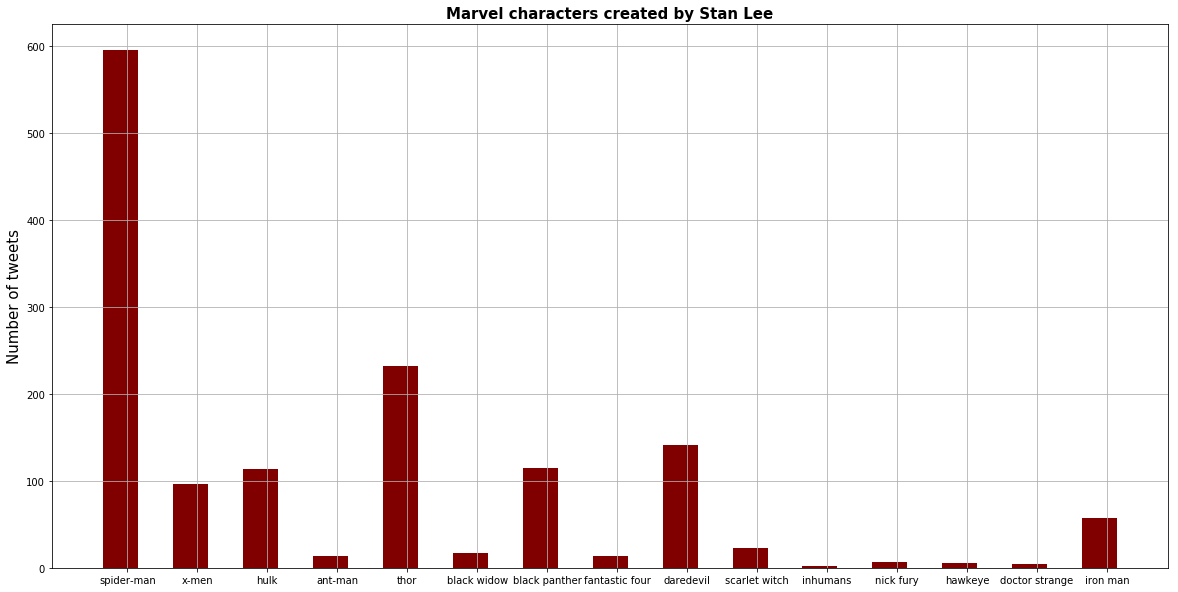

In [26]:
x_pos = list(range(len(prg_langs)))
width = 0.5
# fig, ax = plt.subplots()
fig, ax = plt.subplots( figsize=(20, 10))
plt.bar(x_pos, tweets_by_prg_heros, width, alpha=1, color='maroon')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Marvel characters created by Stan Lee', fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.2 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [28]:
# drop unneccessary field
characters_lang = tweets.drop(['text'], axis=1)

# Fill all none value with the most value 
characters_lang['lang'] = characters_lang['lang'].fillna(characters_lang['lang'].mode()[0]) #with common value

#convert the true/false value to int
characters_lang = characters_lang.applymap(lambda x: 1 if x == True else x)
characters_lang = characters_lang.applymap(lambda x: 0 if x == False else x)

# get sum for each characters by the language
characters_lang = pd.DataFrame(characters_lang.groupby(['lang']).sum())

# delete any rows have value=0 and least value columns
characters_lang = characters_lang.loc[(characters_lang!=0).any(axis=1)]
characterTop5Langauge = characters_lang.drop(['ar', 'da','de','et','eu','fr','it','lt','nl', 'ro', 'ru', 'sv','tr', 'und'])

#Get the top 5 characters
sums = characterTop5Langauge.select_dtypes(pd.np.number).sum().rename('total')

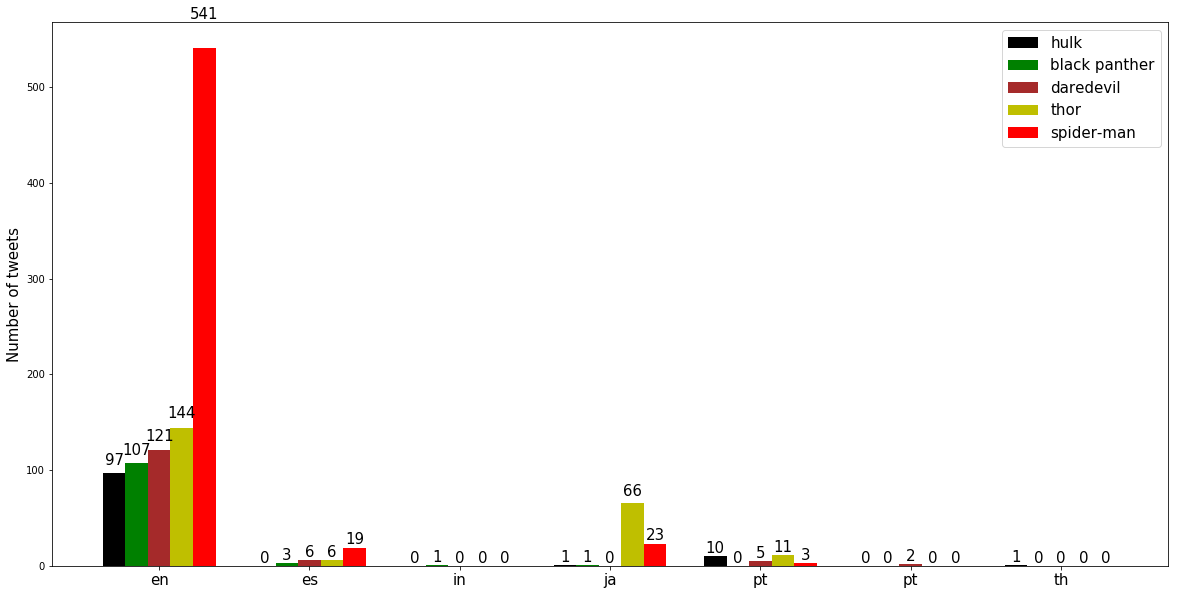

In [30]:
N = 7
ind = np.arange(0, N * 2, 2) # increase the space between the bars
width = 0.3     # the width of the bars

fig, ax = plt.subplots( figsize=(20, 10))

kvals = list(characterTop5Langauge['hulk'])
rects1 = ax.bar(ind, kvals, width, color='black')
yvals = list(characterTop5Langauge['black panther'])
rects2 = ax.bar(ind+width, yvals, width, color='green')
zvals = list(characterTop5Langauge['daredevil'])
rects3 = ax.bar(ind+width*2, zvals, width, color='brown')
Lvals = list(characterTop5Langauge['thor'])
rects4 = ax.bar(ind+width*3, Lvals, width, color='y')
mvals = list(characterTop5Langauge['spider-man'])
rects5 = ax.bar(ind+width*4, mvals, width, color='red')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_xticks(ind+width*2) # this is x label location
ax.set_xticklabels( ('en', 'es', 'in', 'ja', 'pt', 'pt', 'th','tl') , fontsize=15, ha='center')
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0], rects5[0]), ( 'hulk', 'black panther','daredevil','thor', 'spider-man' ) 
         ,fontsize = '15',loc=1)  # loc =1,2,3,4 - each corner

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize = '15')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()